# K-Nearest Neighbors

In [1]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.pipeline import Pipeline

from sklearn.datasets import make_blobs

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, accuracy_score, r2_score

import pandas as pd

import random

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
n_samples = 300
n_features = 2
centers = 4
cluster_std = 1.75

x, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std)

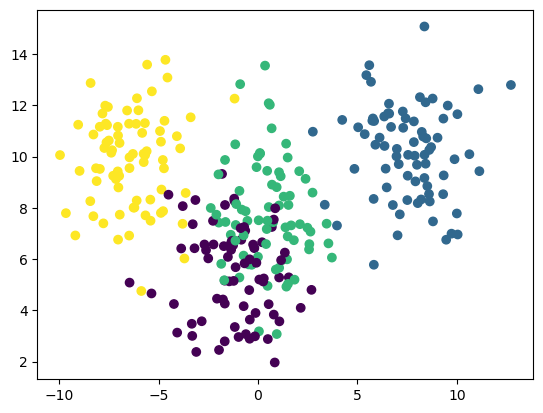

In [3]:
plt.scatter(x[:,0], x[:,1], c=y);

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, test_size=.3)

## KNN Classifier

In [5]:
knn_clf = KNeighborsClassifier()

In [6]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [7]:
knn_clf_pred = knn_clf.predict(x_test)

In [8]:
cr = classification_report(y_test, knn_clf_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.65      0.87      0.74        15
           1       1.00      0.93      0.96        29
           2       0.79      0.71      0.75        21
           3       1.00      0.96      0.98        25

    accuracy                           0.88        90
   macro avg       0.86      0.87      0.86        90
weighted avg       0.89      0.88      0.88        90



## KNN Regressor

In [9]:
knn_reg = KNeighborsRegressor()

In [10]:
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

In [11]:
knn_reg_pred = knn_reg.predict(x_test)

In [12]:
r2_score(y_test, knn_reg_pred)

0.7061950790861159

## KNN PipeLine

### KNN Classifier Pipeline

In [13]:
# knn classifier
knn_clf_pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

In [14]:
knn_clf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('knn', KNeighborsClassifier())])

In [15]:
knn_clf_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'knn', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

In [16]:
knn_clf_param_grid = {
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__weights': ['uniform', 'distance'],
    'knn__n_neighbors': [1,4,5,7],
    'knn__p': [1,2]
}

In [17]:
knn_clf_random_search = RandomizedSearchCV(knn_clf_pipeline, knn_clf_param_grid)

In [18]:
knn_clf_random_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
                   param_distributions={'knn__algorithm': ['auto', 'ball_tree',
                                                           'kd_tree', 'brute'],
                                        'knn__n_neighbors': [1, 4, 5, 7],
                                        'knn__p': [1, 2],
                                        'knn__weights': ['uniform',
                                                         'distance']})

In [19]:
knn_clf_random_search.best_params_

{'knn__weights': 'uniform',
 'knn__p': 1,
 'knn__n_neighbors': 5,
 'knn__algorithm': 'auto'}

In [20]:
knn_clf_rand_search_pred = knn_clf_random_search.predict(x_test)

In [21]:
cr = classification_report(y_test, knn_clf_rand_search_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       1.00      0.93      0.96        29
           2       0.80      0.76      0.78        21
           3       1.00      1.00      1.00        25

    accuracy                           0.90        90
   macro avg       0.88      0.89      0.88        90
weighted avg       0.91      0.90      0.90        90



### KNN Regression Pipeline

In [22]:
knn_reg_pipeline = Pipeline([
    ('knn', KNeighborsRegressor())
])

In [23]:
knn_reg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('knn', KNeighborsRegressor())])

In [24]:
knn_reg_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'knn', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

In [25]:
knn_reg_param_grid = {
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__weights': ['uniform', 'distance'],
    'knn__n_neighbors': [1,4,5,7],
    'knn__p': [1,2]
}

In [26]:
knn_reg_random_search = RandomizedSearchCV(knn_reg_pipeline, knn_reg_param_grid)

In [27]:
knn_reg_random_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('knn', KNeighborsRegressor())]),
                   param_distributions={'knn__algorithm': ['auto', 'ball_tree',
                                                           'kd_tree', 'brute'],
                                        'knn__n_neighbors': [1, 4, 5, 7],
                                        'knn__p': [1, 2],
                                        'knn__weights': ['uniform',
                                                         'distance']})

In [28]:
knn_reg_random_search.best_params_

{'knn__weights': 'uniform',
 'knn__p': 2,
 'knn__n_neighbors': 5,
 'knn__algorithm': 'auto'}

In [29]:
knn_reg_rand_search_pred = knn_reg_random_search.predict(x_test)

In [30]:
r2_score(y_test, knn_reg_rand_search_pred)

0.7061950790861159